In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
import cv2
import matplotlib.pyplot as plt

In [4]:
# import seaborn as sns

In [5]:
data_dir = ('E:\AI_ML_DL\week 5\data\Brain_tumor\Training')
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) 
        # plt.imshow(im_array)

In [ ]:
plt.imshow(img_array)

In [7]:
# Kích thước của ảnh
img_array.shape

(512, 512, 3)

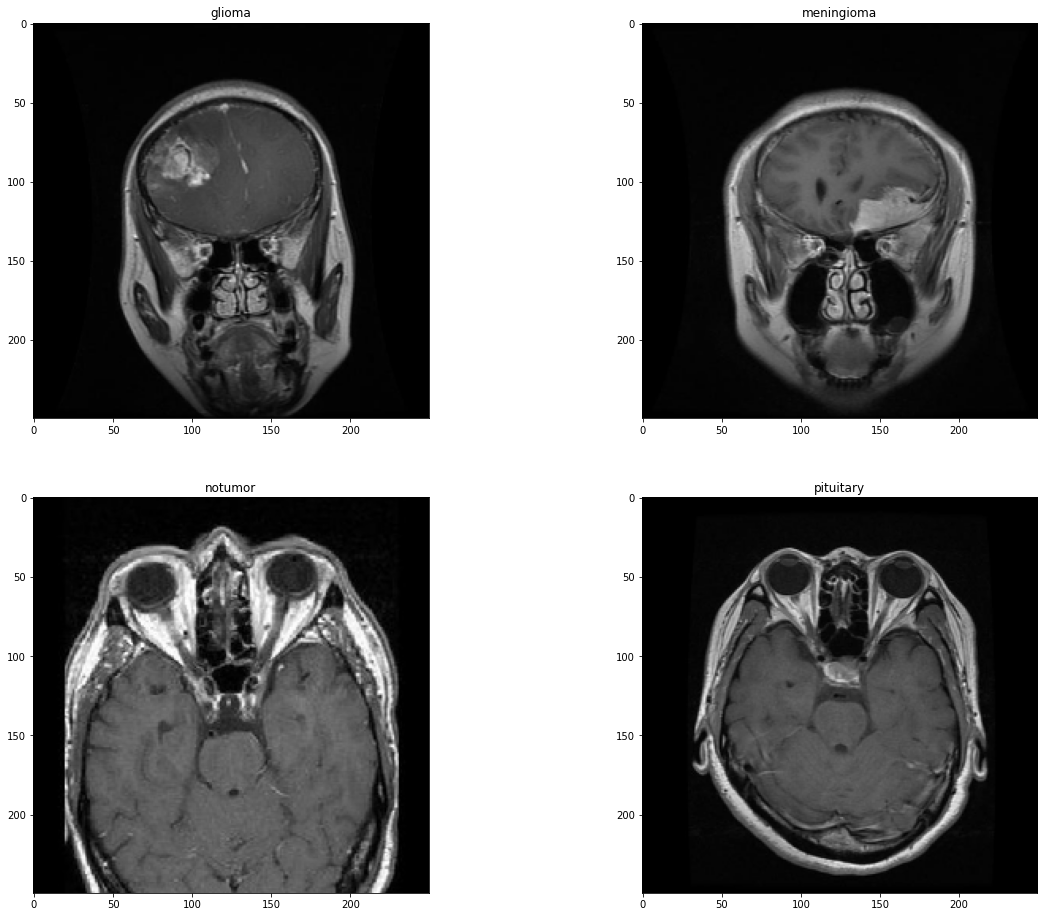

In [11]:
plt.figure(figsize=(20,16))

images_path = ['/glioma/Tr-glTr_0000.jpg', '/meningioma/Tr-meTr_0000.jpg', '/notumor/Tr-noTr_0000.jpg', '/pituitary/Tr-piTr_0000.jpg']
# images_path = ['\glioma\Tr-glTr_0000.jpg', '\meningioma\Tr-meTr_0000.jpg', '\notumor\Tr-noTr_0000.jpg', '\pituitary\Tr-piTr_0000.jpg']  # sai, không resize được (?)
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(data_dir + images_path[i])
    img = cv2.resize(img, (250, 250))
    plt.imshow(img)
    plt.title(categories[i])


Mô Hình

Model 2

In [16]:
model2 = Sequential()

# Convolutional layer 1
model2.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model2.add(Conv2D(128,(7,7),  padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model2.add(Conv2D(256,(7,7),  padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model2.add(Conv2D(512,(7,7),  padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Flatten())

# Full connect layers

model2.add(Dense(units= 512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=4, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics= ['categorical_accuracy'])

In [19]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        3200      
                                                                 
 batch_normalization_4 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 128)       401536    
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                      

In [20]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train = generator_train.flow_from_directory('E:\AI_ML_DL\week 5\data\Brain_tumor\Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('E:\AI_ML_DL\week 5\data\Brain_tumor\Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [22]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model2_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model2_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model2_mcp = ModelCheckpoint(filepath = 'model2_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)


# Fiting the model.
history2 = model2.fit(train, steps_per_epoch=5712//32, epochs=100, validation_data=test, validation_steps= 1311//32,
                      callbacks=[model2_es, model2_rlr])

Epoch 1/100
178/178 [==============================] - 38s 214ms/step - loss: 0.3921 - categorical_accuracy: 0.8512 - val_loss: 1.2696 - val_categorical_accuracy: 0.6414 - lr: 0.0010
Epoch 2/100
178/178 [==============================] - 38s 215ms/step - loss: 0.3082 - categorical_accuracy: 0.8870 - val_loss: 2.6181 - val_categorical_accuracy: 0.3469 - lr: 0.0010
Epoch 3/100
178/178 [==============================] - 38s 215ms/step - loss: 0.2620 - categorical_accuracy: 0.9097 - val_loss: 0.4493 - val_categorical_accuracy: 0.8195 - lr: 0.0010
Epoch 4/100
178/178 [==============================] - 38s 215ms/step - loss: 0.2156 - categorical_accuracy: 0.9262 - val_loss: 0.6376 - val_categorical_accuracy: 0.7195 - lr: 0.0010
Epoch 5/100
178/178 [==============================] - 38s 214ms/step - loss: 0.1682 - categorical_accuracy: 0.9410 - val_loss: 0.5647 - val_categorical_accuracy: 0.7664 - lr: 0.0010
Epoch 6/100
178/178 [==============================] - 38s 214ms/step - loss: 0.1248 

In [23]:
model2.evaluate(test)

41/41 [==============================] - 5s 125ms/step - loss: 0.0447 - categorical_accuracy: 0.9924


[0.04467141628265381, 0.9923722147941589]

Text(0.5, 1.0, 'Loss on Model_2 64 Filtters - 7x7 kernel - 4 Conv Layers')

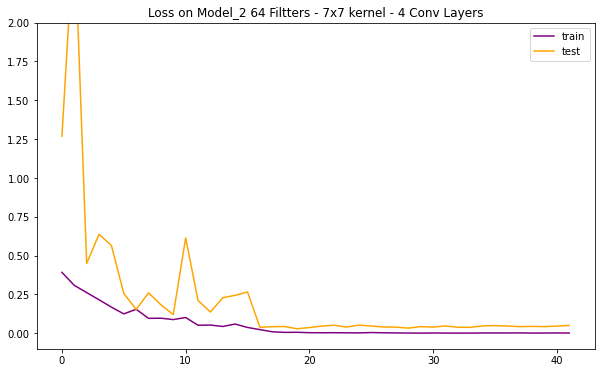

In [26]:
# Code for plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history2.history["loss"],c = "purple")
plt.plot(history2.history["val_loss"],c = "orange")
plt.ylim([-0.1,2])
plt.legend(["train", "test"])
plt.title('Loss on Model_2 64 Filtters - 7x7 kernel - 4 Conv Layers')

In [27]:
# Saving the model
model2_json = model2.to_json()
with open('classifier_brain_tumor.json', 'w') as json_file:
    json_file.write(model2_json)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, model2.predict(test_images))

NameError: name 'test_labels' is not defined

In [35]:
# Predict for each class
# print class
import numpy as np
predictions = model2.predict(test)
test_labels = test["categorical"]

print(categories[np.argmax(predictions[0])])

# # compare with real ones
# print(test_labels[0])

# # print images for show
# i = 0
# plt.figure(figsize=(6, 3))
# plt.subplot(1, 2, 1)
# plot_image(i, predictions[i], test_labels, test_images)
# plt.subplot(1, 2, 2)
# plot_value_array(i, predictions[i], test_labels)
# plt.show()

41/41 [==============================] - 3s 63ms/step


TypeError: '>=' not supported between instances of 'str' and 'int'